# Part 1 - python implementation

In [38]:
import numpy as np
from wpca import WPCA

In [39]:
# X is the delta RV and is already mean subtracted

X = np.loadtxt('X.txt')
X_err = np.loadtxt('X_err.txt')
bjd_daily = np.loadtxt('bjd_daily.txt')

### Plot the inputs

In [40]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

def time_series(x, y, dy, N=None,
				ylabel='',
				title='Time series',
				file_name='Time_series.png'):
	if N==None:
		N = y.shape[1]
	plt.subplots(figsize=(12, N))

	for i in range(N):
		ax = plt.subplot(N, 1, i+1)
		if i == 0:
			plt.title(title)
		plt.errorbar(x, y[:, i], dy[:, i], marker='.', ls='none', alpha=0.5)
		plt.ylabel(ylabel+str(i+1))
		if i != N-1:
			ax.set_xticks([])
		else:
			plt.xlabel('date_bjd')
	plt.show()

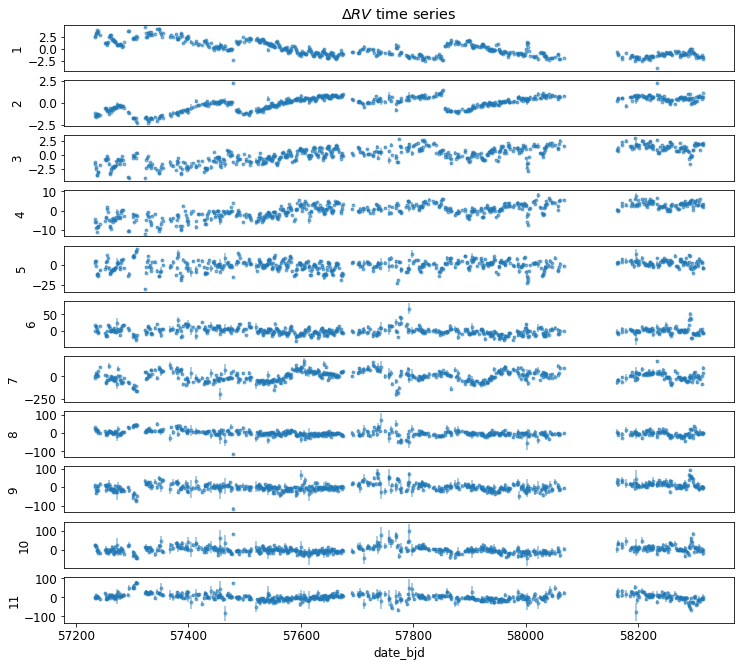

In [41]:
time_series(x=bjd_daily, y=X, dy=X_err, N=None,
				title=r'$\Delta RV$ time series')

###  Calculate the pca scores and basis

In [42]:
def my_pca(X, X_err, n_pca=None, nor=False):
	'''
	X.shape 	= (n_samples, n_features)
	X_err.shape = (n_samples, n_features)
	nor: normalization = True / False
	'''
	
	weights = 1/X_err
	kwds 	= {'weights': weights}

	# subtract the weighted mean for each measurement type (dimension) of X
	X_new 	= np.zeros(X.shape)
	mean 	= np.zeros(X.shape[1])
	std 	= np.zeros(X.shape[1])

	for i in range(X.shape[1]):
		mean[i] = np.average(X[:,i], weights=weights[:,i])
		std[i] 	= np.average((X[:,i]-mean[i])**2, weights=weights[:,i])**0.5

	for i in range(X.shape[1]):
		if nor == True:
			X_new[:,i] 		= (X[:,i] - mean[i]) / std[i]
			weights[:,i]	= weights[:,i] * std[i]
		else:
			X_new[:,i] = X[:,i] - mean[i]

	if n_pca==None:
		n_pca = X.shape[1]

	pca 		= WPCA(n_components=n_pca).fit(X_new, **kwds)
	pca_score 	= pca.transform(X_new, **kwds)
	P 			= pca.components_
    
	return P, pca_score

In [43]:
_, pca_score1 = my_pca(X=X, X_err=X_err, nor=False)

### Plot the scores time series 

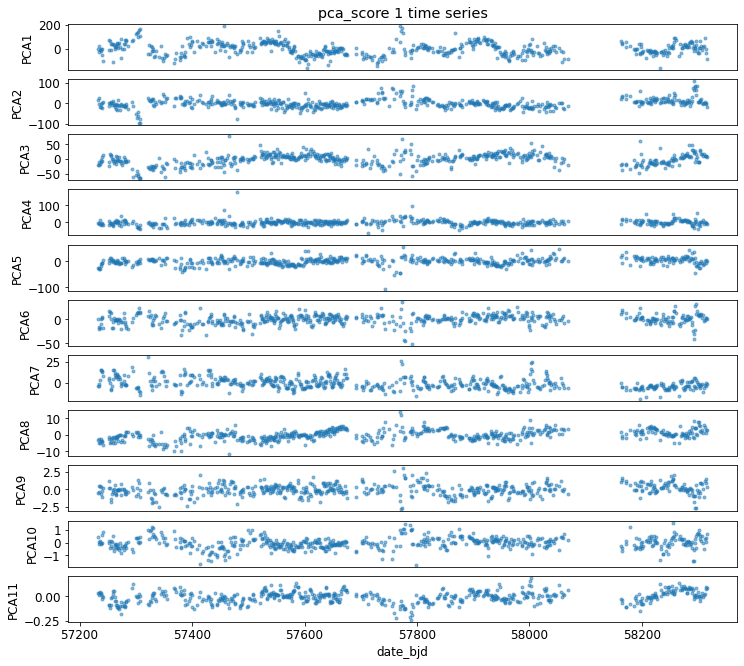

In [44]:
time_series(x=bjd_daily, y=pca_score1, dy=pca_score1*0,
			ylabel='PCA',
			title='pca_score 1 time series')

Clearly PCA1 is dominated by feature 7.

### Test 1 - multiply the error of feature 7 by 100

In [45]:
X_err2 = np.copy(X_err)
X_err2[:, 6] *= 100
_, pca_score2 = my_pca(X=X, X_err=X_err2, nor=False)

### Test 2 - make all errors equal to 1

In [49]:
X_err3 = np.ones(X_err.shape)
_, pca_score3 = my_pca(X=X, X_err=X_err3, nor=False)

### Compare pca_score1, pca_score2 and pca_score3

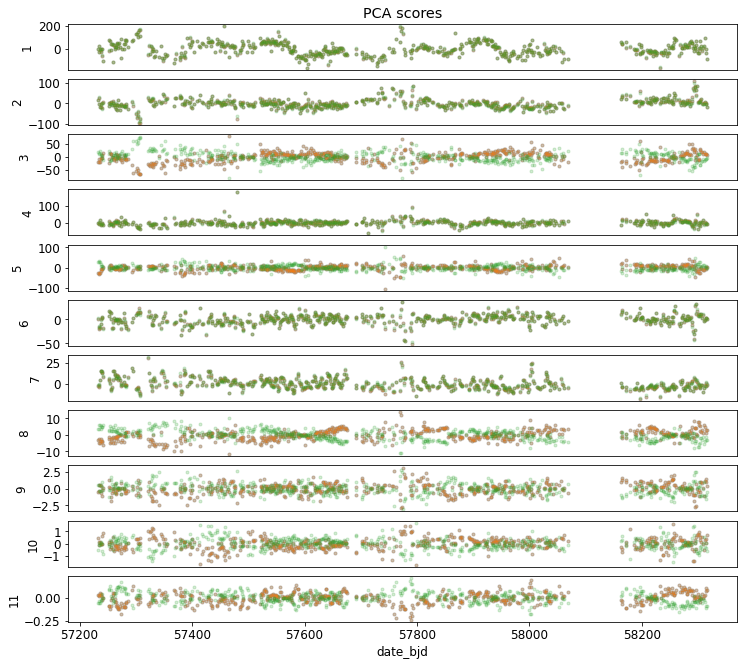

In [51]:
N = pca_score1.shape[1]
plt.subplots(figsize=(12, N))

for i in range(N):
	ax = plt.subplot(N, 1, i+1)
	if i == 0:
		plt.title('PCA scores')
	plt.plot(bjd_daily, pca_score1[:,i], '.', alpha=0.3)
	plt.plot(bjd_daily, pca_score2[:,i], '.', alpha=0.25)
	plt.plot(bjd_daily, pca_score3[:,i], '.', alpha=0.2)
	plt.ylabel(str(i+1))
	if i != N-1:
		ax.set_xticks([])
	else:
		plt.xlabel('date_bjd')
plt.show()

They either overlap or are flipped for each component score.

# Part 2 - MATLAB implementation

In [53]:
matlab_pca_score1 = np.loadtxt('pca_score1.txt', delimiter=',')
matlab_pca_score2 = np.loadtxt('pca_score2.txt', delimiter=',')
matlab_pca_score3 = np.loadtxt('pca_score3.txt', delimiter=',')

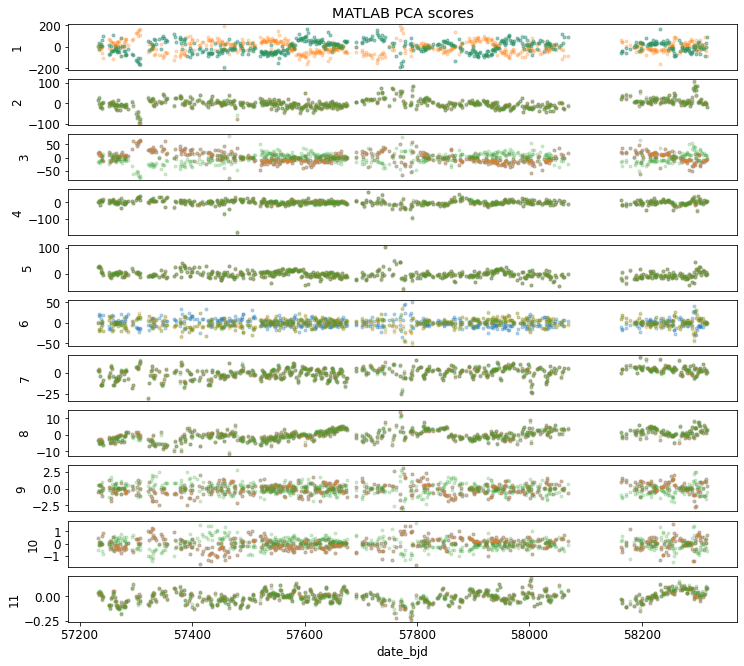

In [54]:
plt.subplots(figsize=(12, N))

for i in range(N):
	ax = plt.subplot(N, 1, i+1)
	if i == 0:
		plt.title('MATLAB PCA scores')
	plt.plot(bjd_daily, matlab_pca_score1[:,i], '.', alpha=0.3)
	plt.plot(bjd_daily, matlab_pca_score2[:,i], '.', alpha=0.25)
	plt.plot(bjd_daily, matlab_pca_score3[:,i], '.', alpha=0.2)
	plt.ylabel(str(i+1))
	if i != N-1:
		ax.set_xticks([])
	else:
		plt.xlabel('date_bjd')
plt.show()

# Part 3 - results from python vs MATLAB

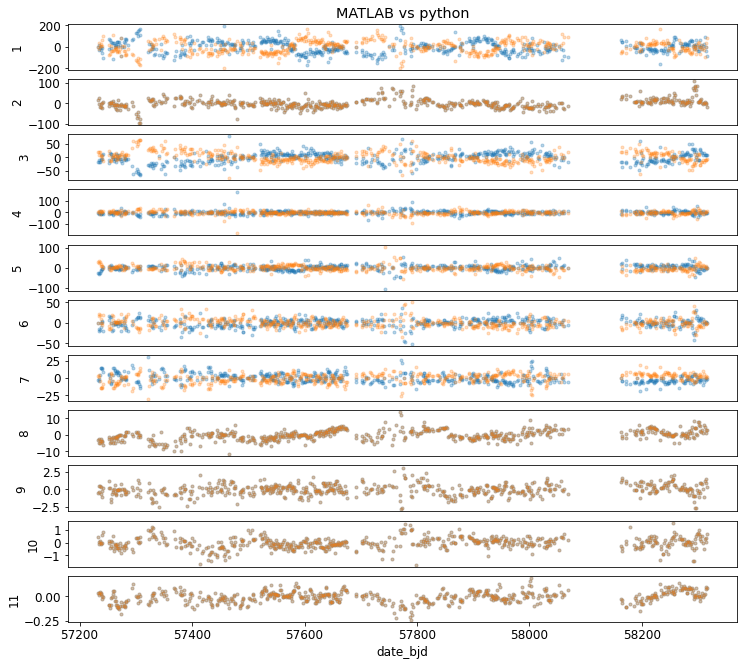

In [55]:
plt.subplots(figsize=(12, N))

for i in range(N):
	ax = plt.subplot(N, 1, i+1)
	if i == 0:
		plt.title('MATLAB vs python')
	plt.plot(bjd_daily, pca_score1[:,i], '.', alpha=0.3)
	plt.plot(bjd_daily, matlab_pca_score1[:,i], '.', alpha=0.25)
	plt.ylabel(str(i+1))
	if i != N-1:
		ax.set_xticks([])
	else:
		plt.xlabel('date_bjd')
plt.show()